# Advanced Insights into Style and Factor Exposures for Portfolio Optimization

In [7]:
# Standard libraries for data handling and numerical operations
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations

# Libraries for plotting and visualization
import matplotlib.pyplot as plt  # For plotting graphs

# Import the font manager from matplotlib for managing fonts
import matplotlib.font_manager as font_manager

import seaborn as sns  # For advanced visualization styles

# Additional libraries for statistical analysis and optimization
import scipy.stats  # For statistical functions
from scipy.optimize import minimize  # For optimization functions
import statsmodels.api as sm

# Libraries for fetching financial data and handling date/time
import yfinance as yf  # For fetching financial data using yfinance
from pandas_datareader import data  # For fetching financial data
from datetime import datetime  # For handling date and time objects

# Import tabulate for creating tables
from tabulate import tabulate

# Custom toolkit for portfolio optimization
import sys
sys.path.append("../../")  # Adding the toolkit's directory to system path
import PortfolioOptimizationKit as pok  # Custom toolkit for portfolio optimization

# Setting the plot style for visual consistency
sns.set_style("dark")  # Setting the plot style for Seaborn

In [2]:
# This line loads the autoreload extension in Jupyter.
# Autoreload helps automatically reload imported modules before executing code,
# ensuring that changes in the modules are reflected without restarting the kernel.
%load_ext autoreload

# This line configures the autoreload extension to reload all modules (not just those listed in %aimport)
# every time code is executed. '2' is the mode of autoreload that ensures this behavior.
%autoreload 2

# This line sets up the Jupyter notebook to display matplotlib plots inline.
# This means that generated plots will appear directly below the code cell that produced them.
%matplotlib inline

In [3]:
# Define the relative paths to the font files from the current working directory
montserrat_font_path = "../../toolbox/font/Montserrat-ExtraBold.ttf"
paytone_font_path = "../../toolbox/font/PaytoneOne.ttf"
sourcesanspro_font_path = "../../toolbox/font/SourceSansProSemiBold.ttf"

# Set the Montserrat-ExtraBold font properties
montserrat_font = font_manager.FontProperties(fname=montserrat_font_path, size=12)

# Set the PaytoneOne font properties
paytone_font = font_manager.FontProperties(fname=paytone_font_path, size=11)

# Set the SourceSansPro font properties
sourcesanspro_font = font_manager.FontProperties(fname=sourcesanspro_font_path, size=10)

## Analysis of Factor Investing

Factor investing focuses on identifying variables that significantly influence **`asset returns`**. These factors represent common traits in the returns that originate from external sources to the individual asset. Typically, **`long-term exposure to factor risk offers a reward`**, known as the **`risk premium`**.

### Categories of Factors

1. **Macro Factors**: These include broad economic elements like industrial growth and inflation.
2. **Statistical Factors**: These are derived from data analysis and may or may not have clear identification.
3. **Style (Intrinsic) Factors**: Examples include value-growth, momentum, and low-volatility.

For instance, oil prices are often seen as a critical macro factor in determining equity returns, as they can significantly impact stock performance. This external influence categorizes it as a macro factor.

### Factor Models

Factor models break down asset returns into several components:

$$
r = β1 f1 + β2 f2 + ... + βn fn + α + ε,
$$

Here, $\{\beta_i\}_{i=1,\dots,n}$ are **`coefficients`**, and $\{f_i\}_{i=1,\dots,n}$ are **`factor premia`**, representing returns obtained in exchange for factor exposure.

Essentially, factor models deconstruct an asset's return into a combination of returns from various other assets.

### The Capital Asset Pricing Model (CAPM)

**`CAPM`** is an application of factor models used for estimating the appropriate return of an asset for portfolio decisions.

The model considers the asset's sensitivity to market-wide, non-diversifiable risks, represented by beta $\beta$, the expected market return, and the expected return of a risk-free asset.

For individual security pricing, CAPM establishes the **`Security Market Line (SML)`**, calculating the reward-to-risk ratio in comparison to the overall market:

$$
SML: E[ri] = βi(E[rm] - rf) + rf,
$$

This equation suggests that an asset's excess return depends on the market's excess return, scaled by the asset's sensitivity to the market $\beta$. The sensitivity factor, $\beta$, is determined as:

$$
\mathbb{E}[r_i] - r_f = \beta_i(\mathbb{E}[r_m] - r_f),
\qquad  
\beta_i := \frac{\text{Cov}(r_i,r_m)}{\text{Var}(r_m)},
$$

A higher $\beta$ indicates **`strong correlation with market movements`**. Conversely, a low $\beta$ suggests **`minimal correlation with the market`**.

The expected market return is generally computed as the arithmetic mean of historical market returns. CAPM, being a one-factor model, ties an asset's excess return solely to the market's excess return.

### Price-to-Book (P/B) Ratio

The book value in accounting is an **`asset's value on the balance sheet, adjusted for depreciation, amortization, or impairment`**. The **`P/B ratio`** compares a **`company's market price`** to its **`book value`**, calculated either by dividing the market capitalization by the total book value or the current share price by the book value per share.

Also known as the **`market-to-book ratio`**, it's a critical metric in financial analysis.

### Value Stocks vs. Growth Stocks

The inverse of the P/B ratio, the **`book-to-price (B/P)`** or **`book-to-market ratio`**, categorizes stocks into 'Value' and 'Growth' stocks.

- **Value Stocks**: High book-to-market ratios indicate undervaluation by the market.
- **Growth Stocks**: Low book-to-market ratios suggest overvaluation, often due to expectations of continuing above-average growth.

Growth stocks are typically linked with robust, successful companies with expected ongoing growth. They are often classified as such if their **`Return on Equity`** (ROE) is 15% or higher.

### Fama-French Model

The **Fama-French model** is a **three-factor** model enhancing the CAPM (one-factor model). The three factors are:
- The market risk (i.e., as in the CAPM),
- The outperformance of **small versus big** companies,
- The outperformance of **high book/market versus low book/market** companies.

Fama and French took the entire universe of stocks and categorized them into ten buckets (**deciles**), sorting them in two ways:

1. By **size** (market capitalization), comparing the performance of the bottom 10% of companies to the top 10% in terms of size.
2. By **book-to-market ratios** (B/P ratio), comparing the bottom 10% companies (Growth Stocks) to the top 10% (Value Stocks).

They observed that the stock classes consistently outperforming the market were:

- **Small caps** (bottom decile with respect to size) and

- **Value Stocks** (top decile with respect to B/P ratios).

Consequently, they introduced the **size factor** and the **value factor** to the market factor of the CAPM, enhancing the model in 1993:

$$
\mathbb{E}[r_i] - r_f =
\beta_{i,\text{MKT}}\mathbb{E}[r_m - r_f] + \beta_{i,\text{SMB}}\mathbb{E}[\text{SMB}] + \beta_{i,\text{HMS}}\mathbb{E}[\text{HMS}]  
$$

where:

- $\beta_{i,\text{MKT}}$ is the CAPM's market-related $\beta$,
- $\text{SMB}$ stands for **Small (size) Minus Big (size)** stocks,
- $\text{HML}$ represents **High (B/P ratio) Minus Low (B/P ratio)** stocks.

The **Carhart four-factor model** further expands on the Fama-French model by adding the **Momentum factor**. Momentum in a stock is its tendency to continue its current price trend. This factor is computed by subtracting the equal weighted average of the lowest performing firms from that of the highest performing firms, lagged one month.

### Factor Benchmark

Factor models can be reinterpreted as benchmarks. For instance, the single CAPM model can be reformulated as follows:
$$
\mathbb{E}[r_i - r_f] = \beta\, \mathbb{E}[r_m - r_f] + \alpha
\quad\Longrightarrow\quad
\mathbb{E}[r_i] = \beta\, \mathbb{E}[r_m] - (\beta-1) \mathbb{E}[r_f]   + \alpha.
$$
This formulation implies that with $1 dollar, one can borrow $(\beta-1)$ dollars and invest $\beta$ dollars in the market. For example, with $\beta=1.3$, it involves borrowing $0.3$ dollars and investing $1.3$ dollars in the market, yielding a return of $1.3\,\mathbb{E}[r_m] - 0.3\,\mathbb{E}[r_f]$.

If an asset in the market yields a return exceeding this calculation, it indicates the manager's value addition to that asset. Using this model, regression analysis determines the $\beta$ value, and the search for $\alpha$ reveals the asset's added value. An asset that does not yield any alpha does not add value, as the same return could be achieved without it. A positive alpha indicates value addition, while a negative alpha suggests the asset is detracting value.

Therefore, the factor benchmark is conceptualized as a short position of $(\beta-1)$ dollars in cash (such as T-bills) and a leveraged position of $\beta$ dollars in the market portfolio.

### Style Analysis

Returns-based style analysis, introduced by W. Sharpe (also a contributor to CAPM), can be viewed as a constrained form of a factor model. It has been applied to evaluating the performance of active managers.

Sharpe's approach involved using a factor-model-like structure with explanatory variables instead of actual factors:
$$
r_t^m = \sum_{i=1}^{N} \beta_i r_t^i + \alpha + \varepsilon, 
$$
where $r_t^m$ represents the historical returns of a manager (or an asset), $\{r_{t}^{i}\}$ denotes a set of returns from various indices (serving as explanatory variables), and $\alpha$ is assumed to be the manager's added value. In this analysis, the $\beta$ coefficients represent exposures to specific market returns and are constrained to sum to $1$. This constraint effectively turns the coefficients into portfolio weights within the explanatory variables:
$$
\sum_{i=1}^N \beta_i = 1.
$$

## Factor Analysis of Warren Buffet's Berkshire Hathaway

To analyze Berkshire Hathaway's performance, the dataset containing daily returns is utilized. These daily returns are compounded into monthly returns for the period from January 1990 to December 2018.

In [4]:
# Load monthly returns of Berkshire Hathaway
brka_rets = pok.get_brka_rets(monthly=True)
# Display the first few rows of the data
brka_rets.head()

,BRKA
DATE,
1990-01,-0.140634
1990-02,-0.030852
1990-03,-0.069204
1990-04,-0.003717
1990-05,0.067164


Next, the factors constituting the Fama-French model are loaded. These factors serve as explanatory variables.

In [5]:
# Load the Fama-French factors
fff = pok.get_fff_returns()
# Display the first few rows of the factors
fff.head()

c:\Users\amine\bin\github-projects\Investment-Management-with-Python-and-Machine-Learning-Specialization\2-Advanced-Portfolio-Construction-and-Analysis-with-Python\notebook\../..\PortfolioOptimizationKit.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  fff = pd.read_csv(filepath, index_col=0, parse_dates=True, na_values=-99.99) / 100


,Mkt-RF,SMB,HML,RF
1926-07,0.0296,-0.0230,-0.0287,0.0022
1926-08,0.0264,-0.0140,0.0419,0.0025
1926-09,0.0036,-0.0132,0.0001,0.0023
1926-10,-0.0324,0.0004,0.0051,0.0032
1926-11,0.0253,-0.0020,-0.0035,0.0031


The columns represent the market return minus the risk-free rate, the Small Minus Big (Size) factor, the High Minus Low (Value) factor, and the pure risk-free rate, likely representing T-Bill returns.

A common analysis period, from January 1990 to May 2015, is selected. The first step involves factor analysis using the CAPM model to decompose Berkshire Hathaway's observed return into market-driven and other components.

$$
R_{\text{brka}, t} - R_{f,t} = \beta(R_{mkt, t} - R_{f,t}) + \alpha + \varepsilon_t.
$$

In [12]:
# Calculate the excess return of Berkshire Hathaway over the risk-free rate
brka_excess_rets = brka_rets["1990":"2015-05"] - fff.loc["1990":"2015-05"][["RF"]].values

# Store the excess return of the market over the risk-free rate
mkt_excess_rets  = fff.loc["1990":"2015-05"][["Mkt-RF"]]

# Copy market excess returns and add a constant for regression
factors = mkt_excess_rets.copy()
factors["alpha"] = 1

# Perform Ordinary Least Squares (OLS) regression
lm = sm.OLS(brka_excess_rets, factors).fit()
# Print summary of regression results
print(lm.summary())

# Display the regression coefficients
print("The coefficients of the regression are:")
lm.params

                            OLS Regression Results                            
Dep. Variable:                   BRKA   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     59.05
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           2.15e-13
Time:                        20:47:39   Log-Likelihood:                 454.77
No. Observations:                 305   AIC:                            -905.5
Df Residuals:                     303   BIC:                            -898.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.5554      0.072      7.685      0.0

Mkt-RF    0.555427
alpha     0.006340
dtype: float64

The regression results indicate a $\beta$ of approximately 0.55 and an $\alpha$ of around 0.006. This implies the CAPM benchmark is composed of $0.46 in Treasury bills and $0.55 in the market for every dollar in the Berkshire Hathaway portfolio. The company's additional monthly return is about 0.6%, albeit with moderate statistical significance.

The analysis then extends to the complete Fama-French model, incorporating additional factors:

In [13]:
# Copy market excess returns and add Size and Value factors
factors["Size"] = fff.loc["1990":"2015-05"][["SMB"]]
factors["Value"] = fff.loc["1990":"2015-05"][["HML"]]
factors["alpha"] = 1

# Perform OLS regression with the extended Fama-French model
lm_ff = sm.OLS(brka_excess_rets, factors).fit()
# Print summary of regression results
lm_ff.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BRKA   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     42.52
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           6.12e-23
Time:                        20:48:18   Log-Likelihood:                 481.50
No. Observations:                 305   AIC:                            -955.0
Df Residuals:                     301   BIC:                            -940.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.6877      0.069     10.013      0.000       0.553       0.823
alpha          0.0054      0.003      1.853      0.065      -0.000       0.011
Size          -0.4889      0.094     -5.202      0.000      -0.674      -0.304
Value          0.3921      0.101      3.887      0.000       0.194       0.591
==============================================================================
Omnibus:                       51.981   Durbin-Watson:                   2.149
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.007
Skew:                           0.929   Prob(JB):                     2.34e-21
Kurtosis:                       5.005   Cond. No.                         38.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With the Fama-French model, $\alpha$ decreases from 0.63% to approximately 0.54% per month. The market loading increases from about 0.55 to 0.68, indicating the additional factors' impact. The positive loading on Value (beta coefficient of HML) suggests Berkshire Hathaway's significant inclination towards Value stocks. Conversely, the negative tilt on Size (beta coefficient of SMB) implies a preference for large companies over small ones, characterizing Berkshire Hathaway as a Large Value investor.

This analysis translates each dollar invested in Berkshire Hathaway to approximately:

- $\$0.68$ in the market and $\$0.32$ in T-Bills,
- $\$0.39$ in Value stocks and short $\$0.38$ in Growth stocks,
- Short $\$0.48$ in SmallCap stocks and long $\$0.50$ in LargeCap stocks.

Despite these allocations, there's still an underperformance relative to Berkshire Hathaway by about $0.54\%$ (54 basis points) per month.

The **`pok.linear_regression(dep_var, expl_vars, alpha=True)`** method in the toolkit can be used for linear regression.

## Sharpe Style Analysis

Sharpe style analysis applies constraints on $\beta$ coefficients, which must be positive and sum to 1. This approach interprets a manager's observed return coefficients as portfolio weights in a collection of basic assets, collectively emulating the return series. This analysis can unveil shifts in a manager's investment style and offer insights into their return-generating strategies.

To conduct Sharpe style analysis, a quadratic optimizer is used to find the weights that minimize the squared difference between the observed series and the returns of a benchmark portfolio containing the explanatory assets in corresponding weights. The objective is to minimize the tracking error between the two return series:
$$
\begin{cases} 
\text{minimize} \; &E(\beta_i)  \\
&\sum_{i=1}^N \beta_i = 1,
\end{cases}
$$
The tracking error is defined as:
$$
E(\beta_i) := \sqrt{ \sum_{t}\left( r_t^m - \sum_{i=1}^{N} \beta_i r_t^i \right)^2 }.
$$
Initially, industry returns are utilized:

In [17]:
# Retrieving industry returns from 2000 onwards
ind_rets = pok.get_ind_file()["2000":]
# Displaying the first few rows of industry returns
ind_rets.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2000-01,-0.0829,-0.0228,-0.0862,0.0229,-0.0092,-0.0651,-0.1138,0.0756,-0.0933,-0.0764,...,-0.0404,-0.0973,-0.0064,-0.0878,-0.0959,0.0899,-0.1453,-0.0739,-0.0442,-0.0412
2000-02,-0.0689,-0.1164,-0.0401,-0.0177,-0.0071,-0.1157,-0.1278,-0.0288,-0.0729,-0.0584,...,-0.0359,0.0759,0.2509,-0.1142,-0.0535,0.0113,-0.0393,-0.1203,-0.0849,-0.0061
2000-03,0.0969,0.0013,0.0511,0.1052,0.1293,-0.1426,0.2506,0.0028,0.1217,0.0535,...,0.0757,0.0269,0.0456,0.0836,0.1287,0.0659,0.1436,0.1598,0.1669,-0.0016
2000-04,-0.0390,0.0368,0.0379,0.0220,-0.0734,0.0429,0.0430,0.0525,-0.0373,0.0648,...,-0.0790,-0.1655,-0.0630,-0.0109,0.0348,-0.0107,-0.0560,0.0382,-0.0425,0.0819
2000-05,0.1565,0.1187,0.1951,0.0119,-0.0593,0.0279,-0.0504,0.0394,-0.0010,-0.0328,...,-0.1041,-0.0892,-0.1165,-0.0137,-0.0363,0.0193,-0.0304,-0.0421,0.0506,0.0531


An artificial manager return series is then constructed, assuming investments in specific industry proportions:

In [18]:
# Creating an artificial manager return series
mgr_rets = 0.3*ind_rets["Beer"] + 0.5*ind_rets["Smoke"] + 0.2*np.random.normal(loc=0.0, scale=0.15/np.sqrt(12), size=ind_rets.shape[0])
# Displaying the first few rows of the manager returns
mgr_rets.head()

2000-01   -0.046648
2000-02   -0.052205
2000-03    0.017260
2000-04    0.018795
2000-05    0.157028
Freq: M, dtype: float64

Without prior knowledge of this manager's investments, the goal is to deduce the investment pattern from observed returns using Sharpe style analysis:

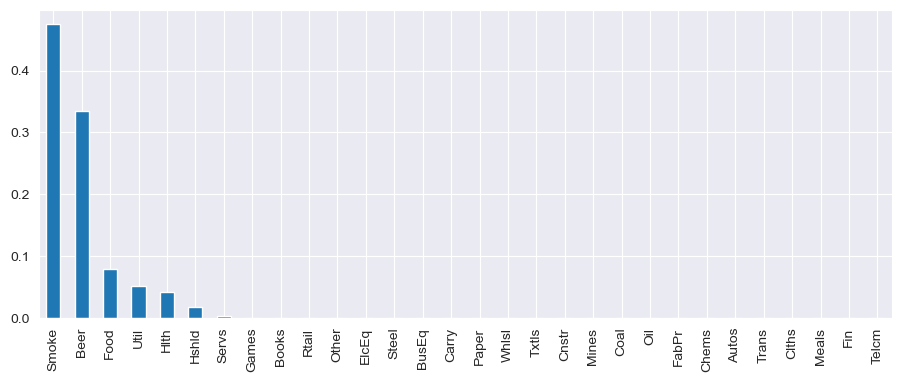

In [19]:
# Running Sharpe style analysis to determine investment pattern
weights = pok.style_analysis(mgr_rets, ind_rets)
# Visualizing the weights in a bar chart
weights.sort_values(ascending=False).plot.bar(grid=True, figsize=(11,4))
plt.show()

The results approximate the manager's actual investments, although some industries might appear falsely due to the synthetic nature of the return series.

A linear regression approach could also be applied, but it would lack the constraints of style analysis:

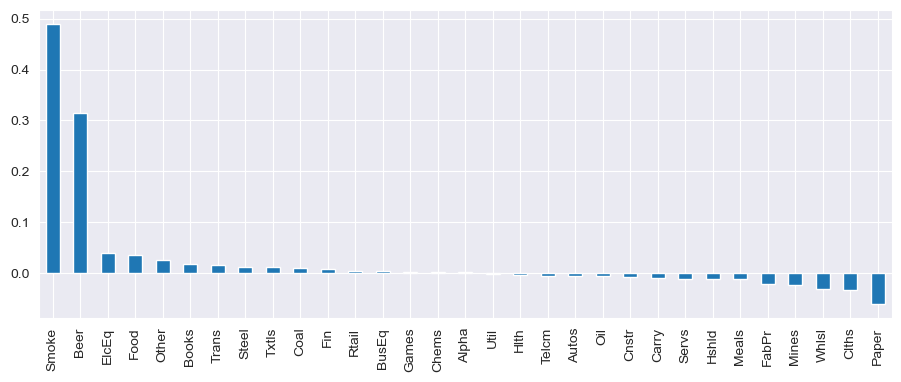

In [20]:
# Performing linear regression to compare with style analysis
betas = pok.linear_regression(mgr_rets, ind_rets).params
# Visualizing the beta coefficients in a bar chart
betas.sort_values(ascending=False).plot.bar(grid=True, figsize=(11,4))
plt.show()

Linear regression might yield negative coefficients, which can be challenging to interpret, especially with real-life data.

### Warning: Potential Misuse of Style Analysis

Style analysis is most effective when the explanatory indices accurately reflect the underlying strategy. It provides valuable insights when using broad market indices or ETFs. However, it will always produce a portfolio, no matter how unreasonable, and the reliability of the results can sometimes be questionable.

To analyze major industries that Buffet invested in since 2000:

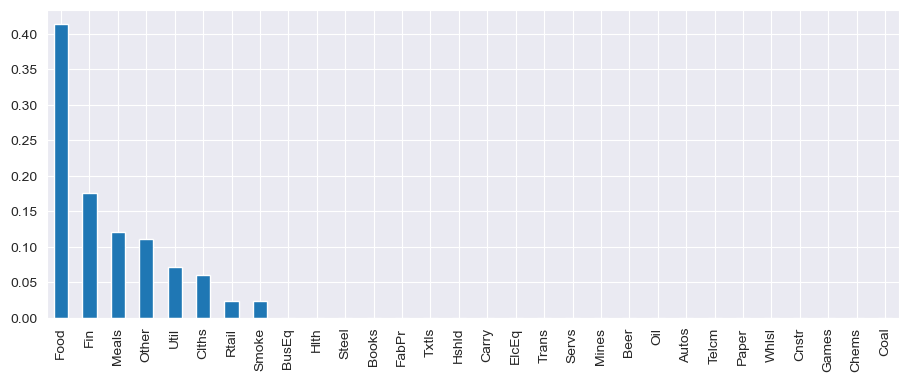

In [21]:
# Retrieving Berkshire Hathaway's returns from 2000 onwards
brka_rets = pok.get_brka_rets(monthly=True)["2000":]
# Applying style analysis to Berkshire Hathaway's returns
weights = pok.style_analysis(brka_rets, ind_rets["2000":])
# Visualizing the weights in a bar chart
weights.sort_values(ascending=False).plot.bar(grid=True, figsize=(11,4))
plt.show()

If only returns from 2009 are considered:

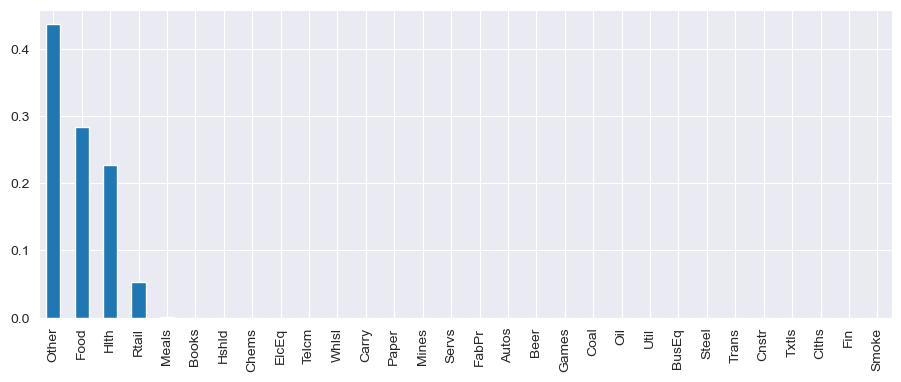

In [23]:
# Applying style analysis to Berkshire Hathaway's returns from 2009
weights = pok.style_analysis(brka_rets["2009":], ind_rets["2009":])
# Visualizing the weights in a bar chart
weights.sort_values(ascending=False).plot.bar(grid=True, figsize=(11,4))
plt.show()

While the analysis can be informative, caution should be exercised in interpreting the results, especially when the specification might not be accurate.

### Style Drift: Time Varying Exposures using Style Analysis

Sharpe style analysis can be used to detect style drift by analyzing style exposures over a rolling window of 1 to 5 years. This can reveal changes in a manager's investment approach.

#### Comparing Equally Weighted (EW) and Cap-Weighted (CW) Portfolios

Loading the Equally-Weighted (EW) and Value-Weighted (VW) versions of industry portfolio returns:

In [24]:
# Loading EW and VW industry portfolio returns
ind_rets_cw = pok.get_ind_file(filetype="rets", nind=30, ew=False)
ind_rets_ew = pok.get_ind_file(filetype="rets", nind=30, ew=True)

It's important to note that "Value-Weighted" here refers to market capitalization weighting, not weighting by value stocks.

Comparing Sharpe ratios of these portfolios:

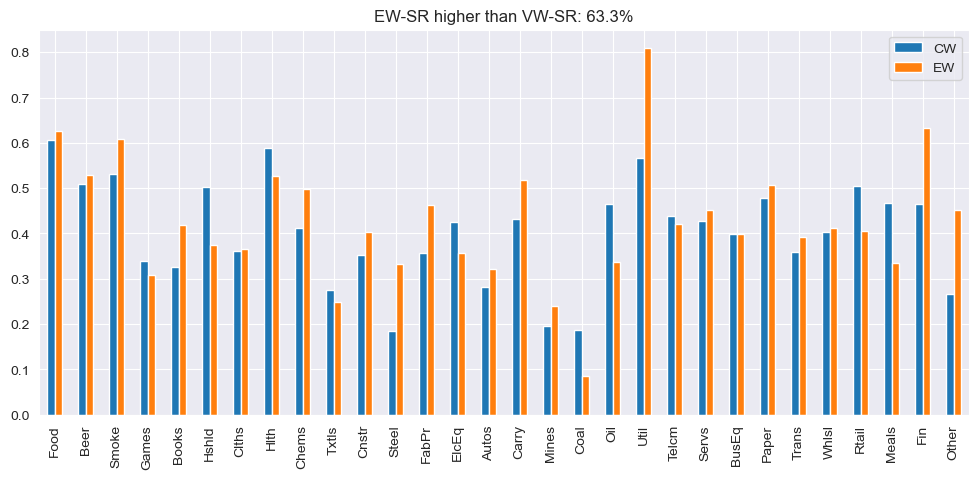

In [25]:
# Setting the risk-free rate for Sharpe ratio calculation
risk_free_rate = 0.03
# Calculating Sharpe ratios for both CW and EW portfolios
sr = pd.DataFrame({
    "CW": pok.sharpe_ratio(ind_rets_cw["1945":], risk_free_rate, 12), 
    "EW": pok.sharpe_ratio(ind_rets_ew["1945":], risk_free_rate, 12)
})
# Calculating the percentage of times EW Sharpe ratio outperforms CW
pew_er = (sr["EW"] > sr["CW"]).sum()/sr.shape[0] * 100
# Visualizing Sharpe ratios in a bar chart
ax = sr.plot.bar(grid=True, figsize=(12,5))
ax.set_title("EW-SR higher than VW-SR: {:.1f}%".format(pew_er))
plt.show()

Improving EW Schemes with CapWeight Tethering
Equally weighted portfolios often undergo modifications to improve tradeability or reduce tracking error relative to Cap-Weighted indices. Modifications may include limiting exposure to microcap stocks and ensuring that no stock's weight exceeds a certain multiple of its Cap-Weighted proportion.

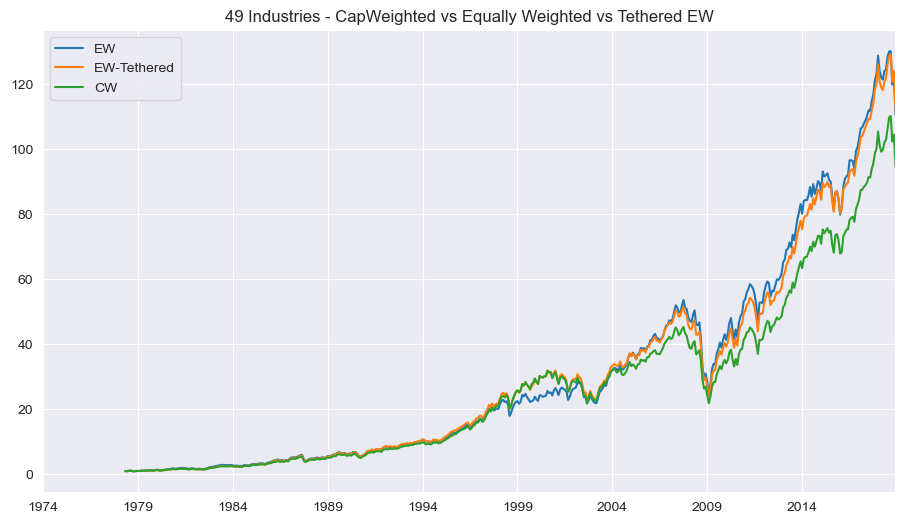

,Ann. return,Ann. vol,Sharpe ratio,Skewness,Kurtosis,Historic CVar,C-F Var,Max Drawdown
EW,0.122663,0.161935,0.556756,-0.795358,6.611038,0.105574,0.072610,-0.528292
EW-Tethered,0.123066,0.157609,0.574537,-0.775615,6.170603,0.101989,0.070588,-0.528869
CW,0.118359,0.148906,0.577377,-0.750963,5.643028,0.096617,0.066751,-0.517468


In [28]:
nind = 49

ind_rets = pok.get_ind_file(filetype="rets", nind=nind)["1974":]
ind_mcap = pok.get_ind_market_caps(nind=nind, weights=True)["1974":]
ind_mcap.head()

# Setting the window for the backtest
window = 52
# Backtesting various weighting schemes
ew_rets    = pok.backtest_weight_scheme(ind_rets, window=window, weight_scheme=pok.weight_ew)
ew_tr_rest = pok.backtest_weight_scheme(ind_rets, window=window, weight_scheme=pok.weight_ew, cap_ws=ind_mcap, max_cw_mult=5, microcap_thr=0.005)
cw_rets    = pok.backtest_weight_scheme(ind_rets, window=window, weight_scheme=pok.weight_cw, cap_ws=ind_mcap)
# Combining the returns for comparison
bt_rets    = pd.DataFrame({"EW": ew_rets, "EW-Tethered": ew_tr_rest, "CW": cw_rets})
# Calculating cumulative growth of each strategy
bt_growth = (1 + bt_rets).cumprod()
# Plotting the growth of strategies
bt_growth.plot(grid=True, figsize=(11,6), title="49 Industries - CapWeighted vs Equally Weighted vs Tethered EW")
plt.show()
# Displaying summary statistics
pok.summary_stats( bt_rets.dropna() )